<center><h1><strong>Proyek UTS Webscraping Website IMDb - Metode Pengumpulan Data Digital</strong></h1></center>


---

<h3><strong> Kelompok 6 </h3></strong>

Anggota :
 
1. Aditya Firmansyah - 2006533143
2. Ainun Syafna Maharani - 2006571186
3. Anantawidya Prayoga - 2006483523
4. Raistra Aurel - 2006572876
5. Zhafirah Tsany - 2006572951



## **Data Scraping**

In [ ]:
import requests                 
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url_base = 'https://www.imdb.com/title/tt0096697/episodes?season='

response = requests.get(url_base)

soup = BeautifulSoup(response.content, 'html.parser')

episodes = soup.find_all('div', {'class': 'info'})

air_dates = []
seasons = []
titles = []
ratings = []

In [ ]:
for sn in range(1,34):
    url = url_base + str(sn)
    response = requests.get(url)

    soup = BeautifulSoup(response.content, 'html.parser')

    episodes = soup.find_all('div', {'class': 'info'})

    for episode in episodes:

        air_date = episode.find('div', {'class': 'airdate'}).text.strip()
        air_dates.append(air_date)

        seasons.append(sn)

        title = episode.find('a', {'itemprop': 'name'}).text.strip()
        titles.append(title)

        rating = episode.find('span', {'class': 'ipl-rating-star__rating'}).text.strip()
        ratings.append(float(rating))

In [ ]:
df = pd.DataFrame({
    'Episode Title': titles,
    'Episode Rating': ratings,
    'Seasons': seasons,
    'Air Date': air_dates  
})
df = df.reset_index(drop=True)
df

,Episode Title,Episode Rating,Seasons,Air Date
0,Simpsons Roasting on an Open Fire,8.1,1,17 Dec. 1989
1,Bart the Genius,7.7,1,14 Jan. 1990
2,Homer's Odyssey,7.3,1,21 Jan. 1990
3,There's No Disgrace Like Home,7.7,1,28 Jan. 1990
4,Bart the General,7.9,1,4 Feb. 1990
...,...,...,...,...
722,My Octopus and a Teacher,6.6,33,24 Apr. 2022
723,Girls Just Shauna Have Fun,6.6,33,1 May 2022
724,Marge the Meanie,6.7,33,8 May 2022
725,Meat Is Murder,6.0,33,15 May 2022


###**Pengubahan Bentuk File dari DF ke CSV**

In [ ]:
!pip install mysql-connector-python
import mysql.connector
from google.colab import drive
drive.mount("/content/drive")
df.to_csv("UTSDatDig.csv",index=False)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 81.9 MB/s eta 0:00:00
Mounted at /content/drive


## **Analisis Data**

### **Top 10 by Rating**

In [ ]:
top_10_rating=df.nlargest(10,"Episode Rating")
print(top_10_rating)

                    Episode Title  Episode Rating  Seasons      Air Date
175                 Homer's Enemy             9.3        8    4 May 1997
82                     Cape Feare             9.2        5   7 Oct. 1993
108         Treehouse of Horror V             9.2        6  30 Oct. 1994
127  Who Shot Mr. Burns? Part One             9.2        6   21 May 1995
154           You Only Move Twice             9.2        8   3 Nov. 1996
70         Marge vs. the Monorail             9.1        4  14 Jan. 1993
75       Last Exit to Springfield             9.0        4  11 Mar. 1993
114               Homer the Great             9.0        6   8 Jan. 1995
128  Who Shot Mr. Burns? Part Two             9.0        7  17 Sep. 1995
134               King Size Homer             9.0        7   5 Nov. 1995


**Insight:** Berdasarkan hasil output tersebut, nampak bahwa Homer's Enemy menduduki peringkat pertama dengan rating 9.3 yang ditayangkan perdana pada 4 Mei 1997. Kemudian, disusul oleh Cape Feare dengan rating 9.2 yang ditayangkan perdana pada tanggal 7 Oktober 1993. Selanjutnya yang menduduki peringkat ketiga adalah Treehouse of Horror V dengan rating 9.2 yang ditayangkan perdana pada tanggal 30 Oktober 1994.

### **Average Rating Analysis**

Average Rating: 7.173039889958734


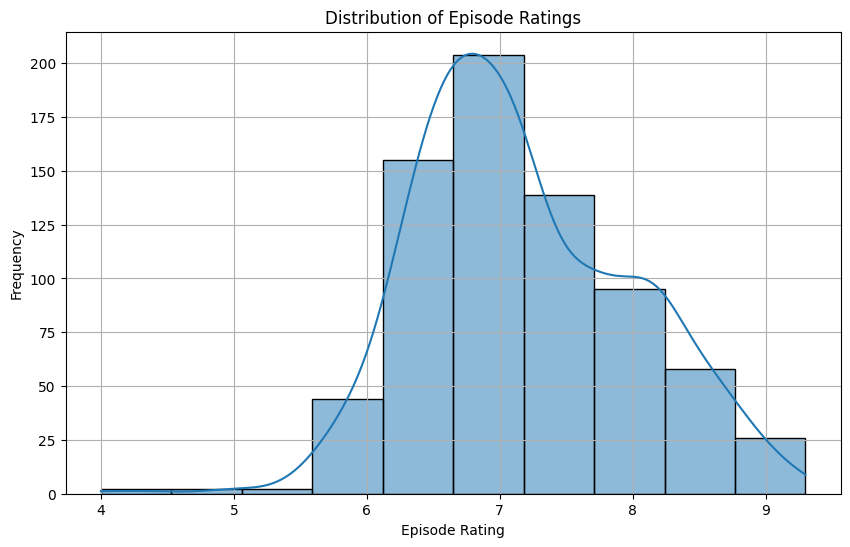

In [ ]:
# Kalkulasi rating rata-rata
avg_rating = df['Episode Rating'].mean()
print('Average Rating:', avg_rating)

# Distribusi rating
plt.figure(figsize=(10, 6))  # size grafik
sns.histplot(df['Episode Rating'].dropna(), bins=10, kde=True)  # membuat histogram
plt.title('Distribution of Episode Ratings')  # judul grafik
plt.xlabel('Episode Rating')  # mendefinisikan label sumbu-x
plt.ylabel('Frequency')  # mendefinisikan label sumbu-y
plt.grid(True)  # menambah grid lines
plt.show()  # menampilkan grafik

**Insight:** Berdasarkan hasil output tersebut, rata-rata rating episode dari series The Simpson adalah 7.173 atau 7.2. Rating tersebut dapat dikatakan cukup tinggi yang berarti masyarakat menyukai series The Simpson. Nampak pada chart distribution of episode ratings, distribusi atau kurva tersebut disebut menjulur ke kiri (skewed to the left) atau mempunyai kemencengan yang negatif (negative skewness). 

### **Release Year Analysis**

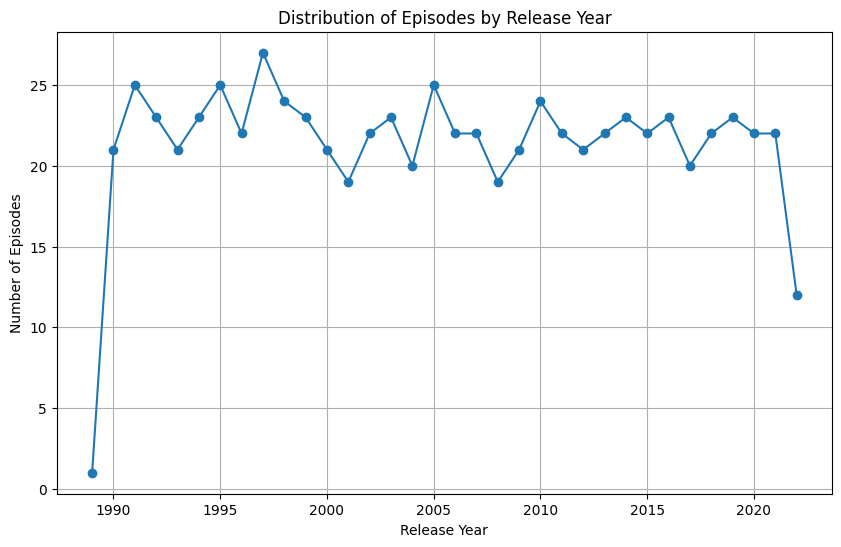

In [ ]:
# Ekstraksi tahun rilis dari kolom 'Air Date'
df['Release Year'] = pd.to_datetime(df['Air Date']).dt.year

# Menggabungkan series per tahun rilis dan jumlah episode dalam masing-masing tahun 
movies_by_year = df['Release Year'].value_counts().sort_index()

# Membuat diagram garis untuk menunjukan distribusi episode per tahun rilis
plt.figure(figsize=(10, 6))  
plt.plot(movies_by_year.index, movies_by_year.values, marker='o', linestyle='-')  # membuat diagram garis
plt.title('Distribution of Episodes by Release Year')  
plt.xlabel('Release Year')  
plt.ylabel('Number of Episodes')  
plt.grid(True)  
plt.show()  

**Insight:** Berdasarkan grafik tersebut, nampak bahwa distribusi episode release series The Simpson pada tahun sebelum tahun 1990 ke tahun 1990 mengalami peningkatan drastis. The Simpson pertama kali release pada tahun 1989. Nampak pula pada tahun 1997 ke tahun 2001 terus mengalami penurunan sebelum akhirnya kembali mengalami peningkatan. Tahun-tahun berikutnya episode release series The Simpson terus mengalami naik-turun sampai pada tahun 2022 episode release mengalami penurunan drastis. 

### **Release Year vs Episode Rating Analysis**

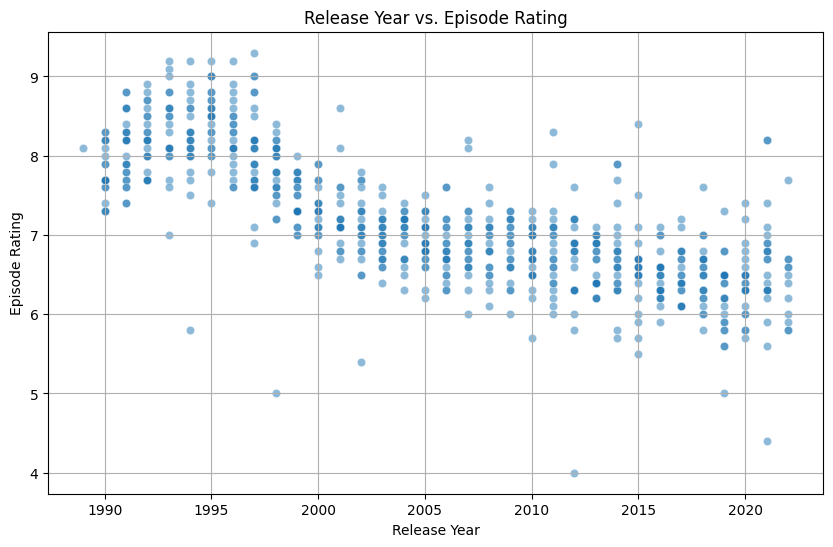

In [ ]:
# Convert kolom 'Episode Rating' menjadi numerik
df['Episode Rating'] = pd.to_numeric(df['Episode Rating'], errors='coerce')

# Membuat scatter plot untuk memvisualisasi hubungan tahun rilis dengan rating  
plt.figure(figsize=(10, 6))  
sns.scatterplot(x='Release Year', y='Episode Rating', data=df, alpha=0.5) 
plt.title('Release Year vs. Episode Rating') 
plt.xlabel('Release Year')  
plt.ylabel('Episode Rating')  
plt.grid(True)  
plt.show()  

**Insight:** Sejak seri The Simpsons tayang, rating episode memiliki tren naik hingga sekitar tahun 1995. Rating-rating tinggi juga diperoleh untuk episode-episode yang tayang disekitar tahun 1995, bahkan pada tahun tersebut terdapat beberapa episode yang memiliki rating di atas 9. Namun, sejak itu sampai tahun 2022, rating The Simpsons memiliki tren turun, dan belum pernah mencapai angka 9 lagi setelah mengalami penurunan

### **Seasonality Analysis**

<ipython-input-9-84cd3885c2c8>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Air Date'] = df['Air Date'].str.replace(r'\.', '')


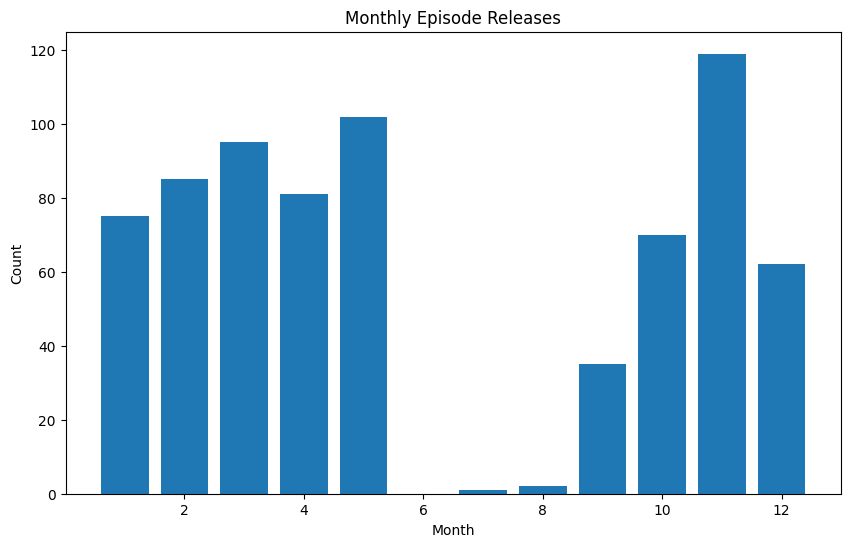

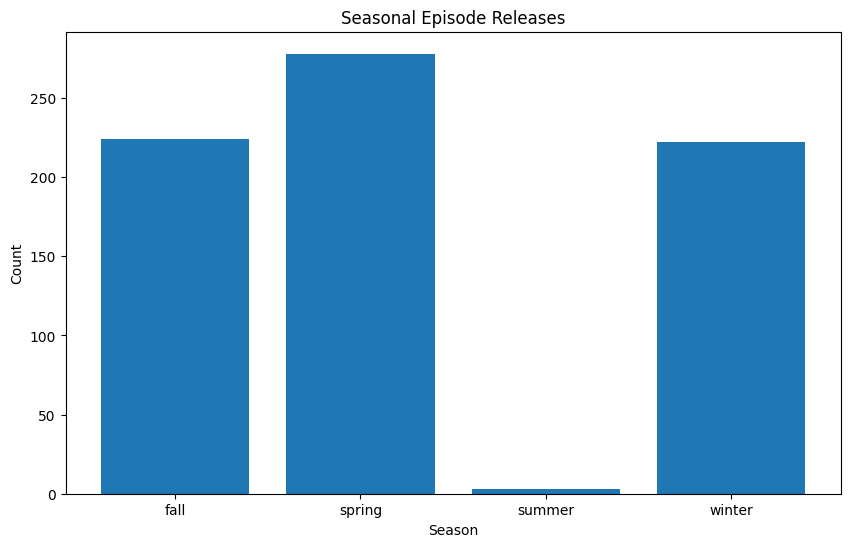

In [ ]:
# Menghapus titik dari bulan
df['Air Date'] = df['Air Date'].str.replace(r'\.', '')

# Mengkonversi kolom "Air Date" menjadi datetime object
df['Air Date'] = pd.to_datetime(df['Air Date'], format='%d %b %Y')
# Ekstraksi bulan dan musim dari 'Air Date'
df['Month'] = df['Air Date'].dt.month
df['Season'] = df['Air Date'].dt.month.apply(lambda x: 'winter' if x in [12, 1, 2]
                                              else 'spring' if x in [3, 4, 5]
                                              else 'summer' if x in [6, 7, 8]
                                              else 'fall' if x in [9, 10, 11]
                                              else None)

# Menggabungkan bulan dan musim, serta kalkulasi jumlah episodes 
monthly_count = df.groupby('Month').size().reset_index(name='Count')
seasonal_count = df.groupby('Season').size().reset_index(name='Count')

# Membuat bar chart untuk rilis episode per bulan
plt.figure(figsize=(10, 6))
plt.bar(monthly_count['Month'], monthly_count['Count'])
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Episode Releases')
plt.show()

# Membuat bar chart untuk rilis episode per musim
plt.figure(figsize=(10, 6))
plt.bar(seasonal_count['Season'], seasonal_count['Count'])
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Seasonal Episode Releases')
plt.show()


**Insight:** Berdasarkan bar chart Monthly Movie Releases, series The Simpson mayoritas direlease pada bulan November, lalu pada bulan Mei, dan Maret. Nampak pula series The Simpson tidak ada yang direlease pada bulan Juni dan hanya sedikit episode yang direlase pada bulan Agustus dan Juli. Hal ini berbanding lurus dengan yang ditampilkan bar chart Seasonal Movie Release. Episode The Simpson banyak direlease pada musim semi (Maret, April, Mei) dan sedikit yang direlease pada musim panas (Juni, Juli, Agustus).

### **Release Day of The Week Analysis**

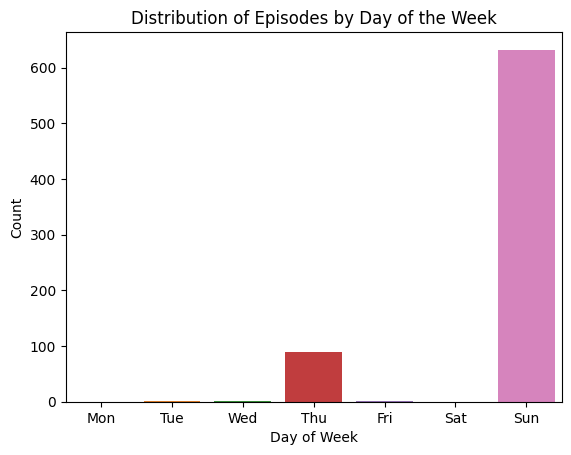

In [ ]:
# Definisikan dictionary untuk melakukan mapping day of the week values ke dalam labels
day_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

# Ekstraksi day of the week (0 = Monday, 1 = Tuesday, dst.) dari 'Air Date'
df['Day of Week'] = df['Air Date'].dt.dayofweek
df['Day of Week'] = df['Day of Week'].map(day_map)
order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Membuat countplot 
sns.countplot(x='Day of Week', data=df, order=order)
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Distribution of Episodes by Day of the Week')
plt.xticks()

# Menunjukan plot
plt.show()

**Insight:** Berdasarkan bar chart di atas nampak bahwa 85% episode release series The Simpson direlease pada hari Minggu dan hanya 15% episode yang direlease pada hari Kamis. 

### **Duration Analysis**

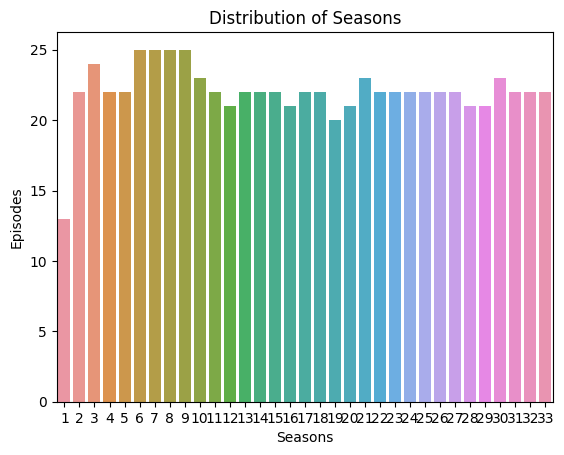

In [ ]:
# Membuat bar chart untuk menunjukan distribusi dari season
sns.countplot(x='Seasons', data=df)
plt.xlabel('Seasons')
plt.ylabel('Episodes')
plt.title('Distribution of Seasons')
plt.show()

**Insight:** Berdasarkan bar chart distribusi episode dari setiap seasons, nampak bahwa  season 6, 7, 8, dan 9 memiliki jumlah episode yang sama dan sama-sama menduduki peringkat pertama season dengan episode terbanyak. Nampak pula season 1 memiliki jumlah episode yang paling sedikit.